In [ ]:
#import ml libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import deeplearning packages
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout, Dense, Flatten, BatchNormalization
from keras import Sequential
from keras.callbacks import EarlyStopping

In [ ]:
dataset = keras.datasets.cifar10
dataset

<module 'keras.api._v2.keras.datasets.cifar10' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/cifar10/__init__.py'>

In [ ]:
(train_images,train_labels), (test_images, test_labels)=keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
print(train_images.shape,train_labels.shape, test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


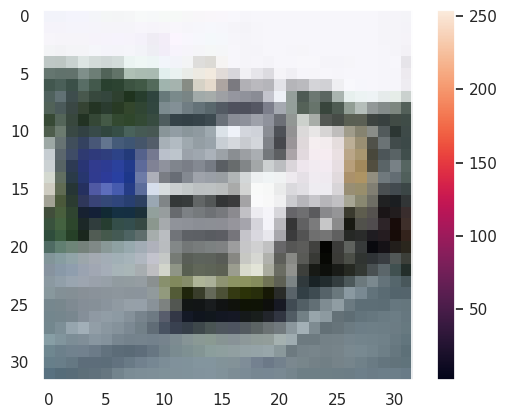

In [ ]:
plt.figure()
plt.imshow(train_images[1000])
plt.colorbar()
plt.grid()
plt.show()

In [ ]:
"""Label	Description
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck"""

'Label\tDescription\n0\tairplane\n1\tautomobile\n2\tbird\n3\tcat\n4\tdeer\n5\tdog\n6\tfrog\n7\thorse\n8\tship\n9\ttruck'

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [ ]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /=255
test_images /=255

TypeError: only integer scalar arrays can be converted to a scalar index

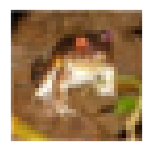

In [ ]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = (32,32,3)))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               786688    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 855050 (3.26 MB)
Trainable params: 85505

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(monitor='val_loss',min_delta =0.01,patience = 20)

In [ ]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=50, callbacks=callback, batch_size = 256)

Epoch 1/50
196/196 [==============================] - 7s 36ms/step - loss: 1.6397 - accuracy: 0.4098 - val_loss: 1.5821 - val_accuracy: 0.4468
Epoch 2/50
196/196 [==============================] - 8s 39ms/step - loss: 1.6437 - accuracy: 0.4094 - val_loss: 1.5939 - val_accuracy: 0.4319
Epoch 3/50
196/196 [==============================] - 7s 34ms/step - loss: 1.6491 - accuracy: 0.4063 - val_loss: 1.5819 - val_accuracy: 0.4398
Epoch 4/50
196/196 [==============================] - 7s 36ms/step - loss: 1.6422 - accuracy: 0.4089 - val_loss: 1.5938 - val_accuracy: 0.4396
Epoch 5/50
196/196 [==============================] - 7s 33ms/step - loss: 1.6376 - accuracy: 0.4101 - val_loss: 1.6001 - val_accuracy: 0.4397
Epoch 6/50
196/196 [==============================] - 7s 38ms/step - loss: 1.6376 - accuracy: 0.4128 - val_loss: 1.5858 - val_accuracy: 0.4378
Epoch 7/50
196/196 [==============================] - 6s 32ms/step - loss: 1.6385 - accuracy: 0.4107 - val_loss: 1.5895 - val_accuracy: 0.4383